# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
347,2024-03-27,20,20,17,85.000000,15.000000,72.3135,easy,2024-03-27
348,2024-03-28,18,17,16,94.117647,5.882353,149.3120,medium,2024-03-28
349,2024-03-29,20,19,16,84.210526,15.789474,76.4350,easy,2024-03-29
350,2024-03-30,20,20,20,100.000000,0.000000,124.4320,medium,2024-03-30


How many people are playing Reflect?

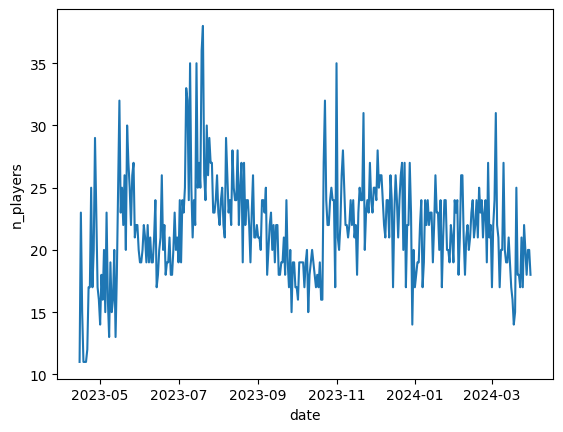

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

930

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2024-03-27,20,20,17,85.000000,15.000000,72.3135,easy,2024-03-27,puzzle-2024-03-27.txt,...,5.400000,9,27,2,0,2,1,8,5,69.3
348,2024-03-28,18,17,16,94.117647,5.882353,149.3120,medium,2024-03-28,puzzle-2024-03-28.txt,...,4.285714,7,30,0,0,2,1,10,5,inf
349,2024-03-29,20,19,16,84.210526,15.789474,76.4350,easy,2024-03-29,puzzle-2024-03-29.txt,...,4.500000,9,27,8,0,2,1,9,5,118.4
350,2024-03-30,20,20,20,100.000000,0.000000,124.4320,medium,2024-03-30,puzzle-2024-03-30.txt,...,4.000000,5,24,0,0,2,1,9,5,115.1


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

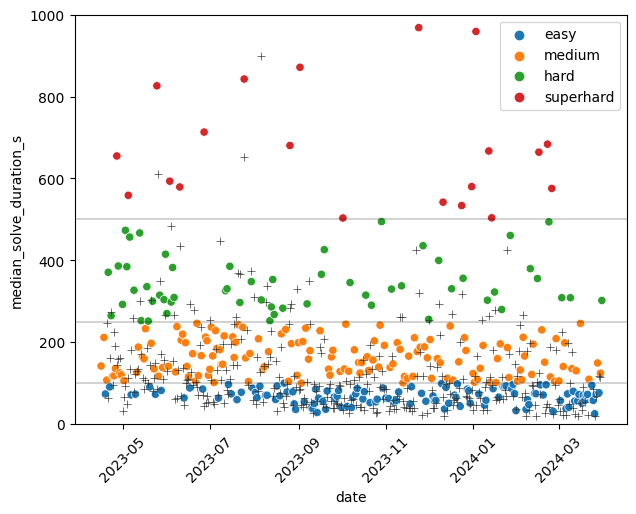

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

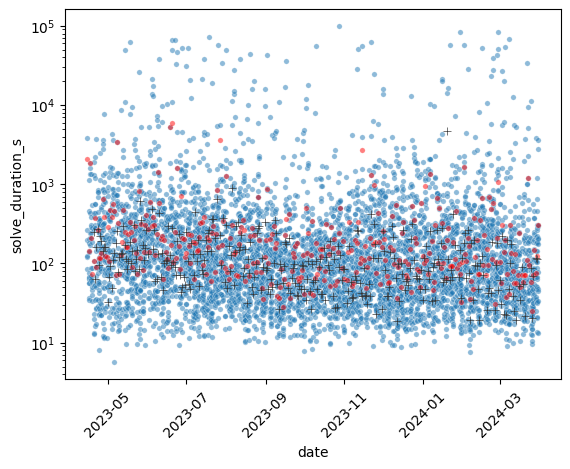

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

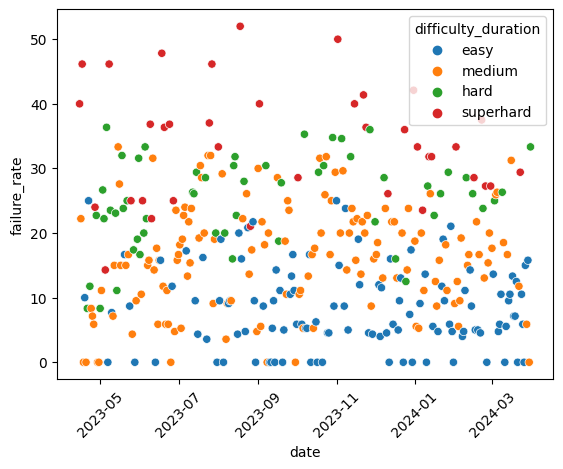

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.532857,0.093344,0.027536,0.095789,0.077235,0.020190,0.127791,0.021335,0.068407,0.094711,0.046975,-0.020795,0.057876,0.143373,0.139458,0.143655,0.108531
failure_rate,0.532857,1.000000,0.144991,0.063456,0.107094,0.068762,0.067960,0.161135,0.060073,0.089420,0.162425,-0.001481,-0.069152,0.153090,0.079266,0.256778,0.157838,0.118726
excess_reflections,0.143655,0.157838,0.290675,-0.265930,-0.214623,0.490030,0.440973,0.383561,-0.102308,-0.056118,-0.201563,0.340683,0.240062,0.085719,0.104205,0.052697,1.000000,0.787696
total_beam_distance,0.143373,0.079266,0.154446,0.066779,0.368362,0.294726,-0.174986,0.081750,0.065098,0.208327,-0.061698,0.350907,0.201088,0.287951,1.000000,0.258978,0.104205,0.044322
excess_beam_distance,0.139458,0.256778,-0.148474,-0.298377,-0.166713,0.246843,0.122801,0.207661,-0.073690,-0.005657,-0.180296,0.195254,0.319757,0.641807,0.258978,1.000000,0.052697,-0.022182
max_blocks_per_beam,0.127791,0.161135,0.105375,-0.210581,-0.102114,0.373417,0.280496,1.000000,-0.239330,0.065781,-0.081261,0.284760,0.117580,0.241412,0.081750,0.207661,0.383561,0.025757
num_excess_reflection_beams,0.108531,0.118726,0.249860,-0.105877,-0.099929,0.346811,0.381656,0.025757,0.049542,0.067500,0.028008,0.248104,0.081849,-0.090005,0.044322,-0.022182,0.787696,1.000000
num_beams,0.095789,0.107094,0.026990,0.801330,1.000000,-0.164482,-0.524813,-0.102114,0.218217,0.772783,0.625498,0.217975,-0.810428,-0.207947,0.368362,-0.166713,-0.214623,-0.099929
max_beams_per_block,0.094711,0.162425,-0.029822,0.524955,0.625498,-0.277779,-0.189290,-0.081261,0.299216,0.650364,1.000000,-0.252309,-0.681606,-0.278551,-0.061698,-0.180296,-0.201563,0.028008
num_blocks,0.093344,0.144991,1.000000,-0.017854,0.026990,0.501188,0.453203,0.105375,0.453861,-0.200372,-0.029822,0.129288,0.028945,-0.112225,0.154446,-0.148474,0.290675,0.249860


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

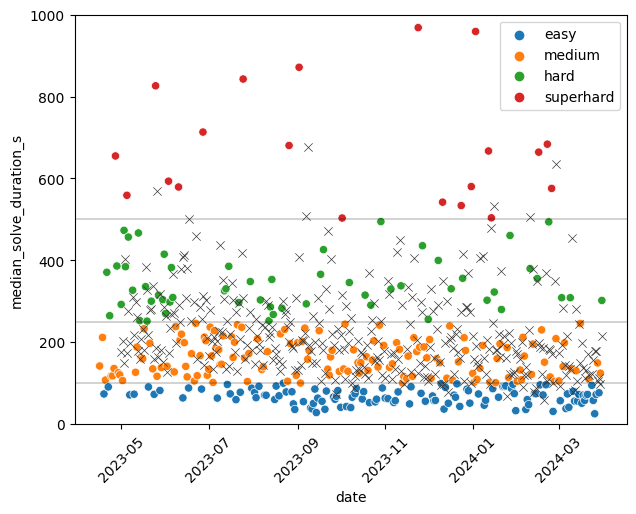

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');